In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [106]:
# pip install shap lightgbm

In [107]:
main = pd.read_csv("D:/University/4th Year/ST4035 - Data Science/Group Project Modelling/df_voicemail_false.csv")
df = main.copy()
backup = main.copy()

df.head()

,churn,accountlength,internationalplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaleveminutes,totalevecalls,totalnightminutes,totalnightcalls,totalintlminutes,totalintlcalls,numbercustomerservicecalls
0,0,137.0,0,0.0,243.4,114.0,121.2,110.0,162.6,104.0,12.2,5.0,0.0
1,0,84.0,1,0.0,299.4,71.0,61.9,88.0,196.9,89.0,6.6,7.0,2.0
2,0,75.0,1,0.0,166.7,113.0,148.3,122.0,186.9,121.0,10.1,3.0,3.0
3,0,118.0,1,0.0,223.4,98.0,220.6,101.0,203.9,118.0,6.3,6.0,0.0
4,0,147.0,1,0.0,157.0,79.0,103.1,94.0,211.8,96.0,7.1,6.0,0.0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       3677 non-null   int64  
 1   accountlength               3677 non-null   float64
 2   internationalplan           3677 non-null   int64  
 3   numbervmailmessages         3677 non-null   float64
 4   totaldayminutes             3677 non-null   float64
 5   totaldaycalls               3677 non-null   float64
 6   totaleveminutes             3677 non-null   float64
 7   totalevecalls               3677 non-null   float64
 8   totalnightminutes           3677 non-null   float64
 9   totalnightcalls             3677 non-null   float64
 10  totalintlminutes            3677 non-null   float64
 11  totalintlcalls              3677 non-null   float64
 12  numbercustomerservicecalls  3677 non-null   float64
dtypes: float64(11), int64(2)
memory u

In [109]:
#df['internationalplan'] = df['internationalplan'].astype('category')
#df.head()

In [110]:
df = df.drop(columns='numbervmailmessages')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       3677 non-null   int64  
 1   accountlength               3677 non-null   float64
 2   internationalplan           3677 non-null   int64  
 3   totaldayminutes             3677 non-null   float64
 4   totaldaycalls               3677 non-null   float64
 5   totaleveminutes             3677 non-null   float64
 6   totalevecalls               3677 non-null   float64
 7   totalnightminutes           3677 non-null   float64
 8   totalnightcalls             3677 non-null   float64
 9   totalintlminutes            3677 non-null   float64
 10  totalintlcalls              3677 non-null   float64
 11  numbercustomerservicecalls  3677 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 344.8 KB


In [112]:
quants = list(df.columns)
del quants[quants.index('internationalplan')]
del quants[quants.index('churn')]
cats=['internationalplan']
print(quants)

['accountlength', 'totaldayminutes', 'totaldaycalls', 'totaleveminutes', 'totalevecalls', 'totalnightminutes', 'totalnightcalls', 'totalintlminutes', 'totalintlcalls', 'numbercustomerservicecalls']


In [113]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='churn',axis=1)
Y = df['churn']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [114]:
from sklearn.metrics import recall_score,precision_score,f1_score,confusion_matrix, classification_report

def get_metrics(ypreds_train, ypreds_test,y_train=y_train,y_test=y_test):
    print("Training Data Metrics")
    print(f"Training Precision: {precision_score(y_true=y_train,y_pred=ypreds_train)}")
    print(f"Training Recall Score: {recall_score(y_true=y_train,y_pred=ypreds_train)}")
    print(f"Training F1 Score: {f1_score(y_true=y_train,y_pred=ypreds_train)}")
    
    print("...................................................")
    print("Testing Data Metrics")
    print(f"Testing Precision: {precision_score(y_true=y_test,y_pred=ypreds_test)}")
    print(f"Testing Recall Score: {recall_score(y_true=y_test,y_pred=ypreds_test)}")
    print(f"Testingg F1 Score: {f1_score(y_true=y_test,y_pred=ypreds_test)}")
    
    sns.heatmap(confusion_matrix(y_pred=ypreds_test,y_true=y_test),annot=True,cmap='YlGnBu')
    plt.title("Test Confusion Matrix")
    plt.show()
    

# Without SMOTE

In [115]:
X_train = x_train
Y_train = y_train

In [116]:
X_test = x_test.copy()

In [117]:
from collections import Counter
Counter(Y_train)

Counter({0: 2432, 1: 509})

In [118]:
Counter(y_test)

Counter({0: 640, 1: 96})

## Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Initialize the logistic regression model
lr = LogisticRegression(random_state=100)

# Train the model
lr.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

# Evaluate the model
lr_accuracy = accuracy_score(list(y_test), y_pred_lr_test)
print("Logistic Regression testing Accuracy: ", lr_accuracy*100)

Logistic Regression testing Accuracy:  86.82065217391305


Training Data Metrics
Training Precision: 0.5220588235294118
Training Recall Score: 0.13948919449901767
Training F1 Score: 0.22015503875968992
...................................................
Testing Data Metrics
Testing Precision: 0.48148148148148145
Testing Recall Score: 0.13541666666666666
Testingg F1 Score: 0.2113821138211382


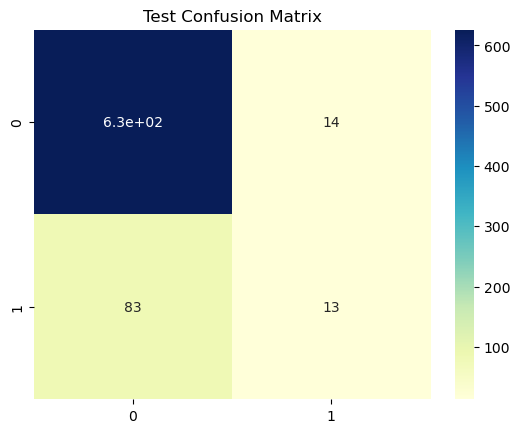

In [120]:
get_metrics(ypreds_train=y_pred_lr_train, ypreds_test=y_pred_lr_test,y_train=Y_train,y_test=y_test)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters: {'C': 10, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8600543478260869
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       640
           1       0.43      0.24      0.31        96

    accuracy                           0.86       736
   macro avg       0.66      0.60      0.62       736
weighted avg       0.83      0.86      0.84       736



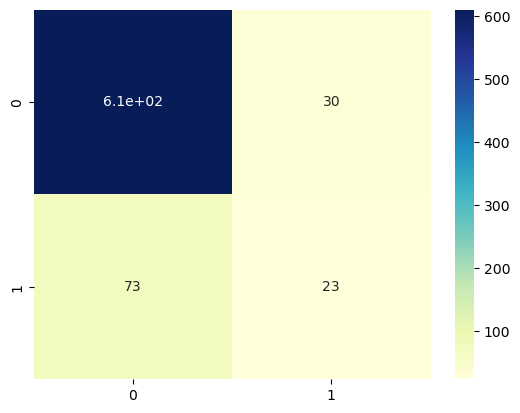

In [121]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the Logistic Regression model
logreg = LogisticRegression()

# Define the hyperparameter grid to search
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],                # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],     # Algorithm to use in optimization
    'max_iter': [100, 200, 300]                   # Maximum number of iterations
}

# Initialize GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Predict on test set with the best model
y_pred_lr_best = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr_best)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_lr_best))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_best),annot=True,cmap='YlGnBu')
plt.show()

## Decsion Tree

Decision Tree testing Accuracy:  91.03260869565217
Training Data Metrics
Training Precision: 1.0
Training Recall Score: 1.0
Training F1 Score: 1.0
...................................................
Testing Data Metrics
Testing Precision: 0.6271186440677966
Testing Recall Score: 0.7708333333333334
Testingg F1 Score: 0.6915887850467289


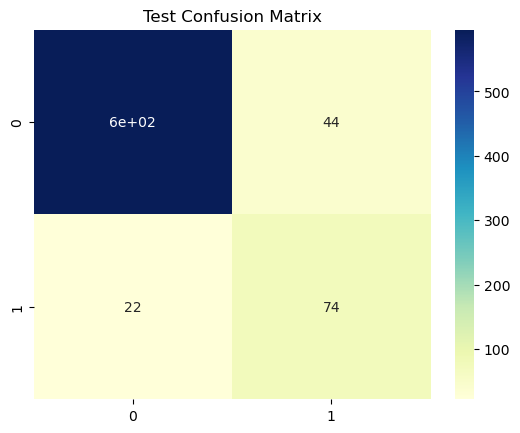

In [122]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the logistic regression model
tree = DecisionTreeClassifier()

# Train the model
tree.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test = tree.predict(X_test)
y_pred_train = tree.predict(X_train)

# Evaluate the model
lr_accuracy = accuracy_score(list(y_test), y_pred_test)
print("Decision Tree testing Accuracy: ", lr_accuracy*100)
get_metrics(ypreds_train=y_pred_train, ypreds_test=y_pred_test,y_train=Y_train,y_test=y_test)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.9442934782608695
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       640
           1       0.85      0.70      0.77        96

    accuracy                           0.94       736
   macro avg       0.90      0.84      0.87       736
weighted avg       0.94      0.94      0.94       736



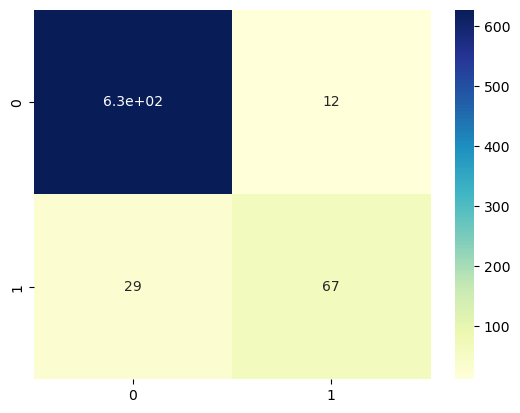

In [123]:
dt = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],            # Criterion for splitting (gini or entropy)
    'max_depth': [None, 10, 20, 30, 40, 50],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4],               # Minimum number of samples required in a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Initialize GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Predict on the test set with the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,cmap='YlGnBu')
plt.show()

## Random Forrest

Training Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2432
           1       1.00      1.00      1.00       509

    accuracy                           1.00      2941
   macro avg       1.00      1.00      1.00      2941
weighted avg       1.00      1.00      1.00      2941

Testing Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       640
           1       0.89      0.75      0.81        96

    accuracy                           0.96       736
   macro avg       0.93      0.87      0.89       736
weighted avg       0.95      0.96      0.95       736



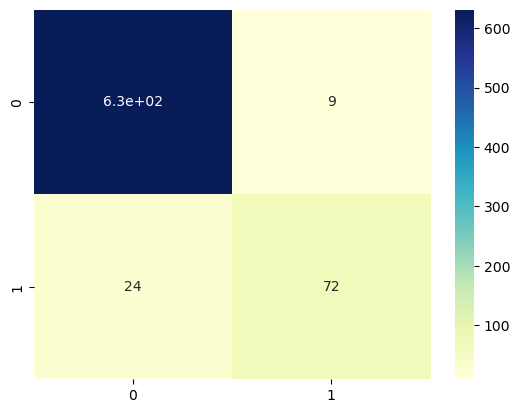

In [124]:
from sklearn.ensemble import RandomForestClassifier

forrest = RandomForestClassifier()

# Train the model
forrest.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test = forrest.predict(X_test)
y_pred_train = forrest.predict(X_train)

# Evaluate the model
lr_accuracy = accuracy_score(list(y_test), y_pred_lr_test)
print("Training Report")
print(classification_report(y_pred=y_pred_train,y_true=Y_train))
print("Testing Report")
print(classification_report(y_test, y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,cmap='YlGnBu')
plt.show()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Random Forest Parameters: {'bootstrap': False, 'max_depth': 33, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 178}
Training Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2432
           1       1.00      1.00      1.00       509

    accuracy                           1.00      2941
   macro avg       1.00      1.00      1.00      2941
weighted avg       1.00      1.00      1.00      2941

Testing Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       640
           1       0.88      0.80      0.84        96

    accuracy                           0.96       736
   macro avg       0.92      0.89      0.91       736
weighted avg       0.96      0.96      0.96       736



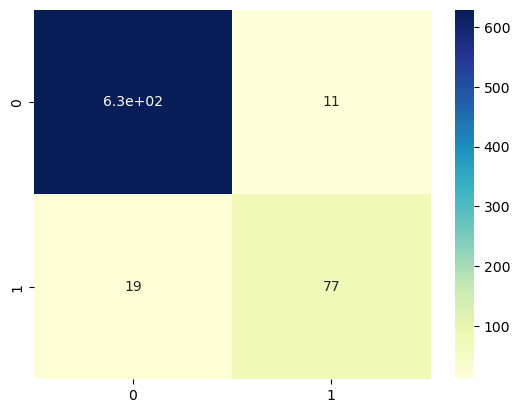

In [125]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
# Define hyperparameters for random forest
rf_params = {
    'n_estimators': [178, 179], # Number of trees restricted
    'max_depth': [32, 33], # Maximum depth of the tree
    'min_samples_split': [2, 3], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [False],  # Whether bootstrap samples are used when building trees
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use GridSearchCV to find the best parameters with 5-fold cross-validation
grid_search_rf = GridSearchCV(rf, rf_params, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

# Fit the model on the training data
grid_search_rf.fit(X_train, Y_train)
#random_search_rf.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_rf = grid_search_rf.best_estimator_
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# Training performance
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

print("Training Report")
print(classification_report(y_pred=y_pred_train,y_true=Y_train))
print("Testing Report")
print(classification_report(y_test, y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,cmap='YlGnBu')
plt.show()

## Naive Bayes

Training Report
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2432
           1       0.54      0.39      0.45       509

    accuracy                           0.84      2941
   macro avg       0.71      0.66      0.68      2941
weighted avg       0.82      0.84      0.82      2941

Testing Report
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       640
           1       0.35      0.32      0.34        96

    accuracy                           0.83       736
   macro avg       0.63      0.62      0.62       736
weighted avg       0.83      0.83      0.83       736



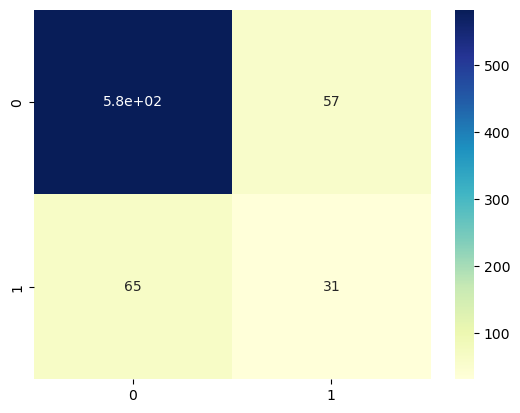

In [126]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Train the model
gnb.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

# Evaluate the model
lr_accuracy = accuracy_score(list(y_test), y_pred_lr_test)
print("Training Report")
print(classification_report(y_pred=y_pred_train,y_true=Y_train))
print("Testing Report")
print(classification_report(y_test, y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,cmap='YlGnBu')
plt.show()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Random Forest Parameters: {'bootstrap': False, 'max_depth': 33, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 178}
Training Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2432
           1       0.98      0.20      0.33       509

    accuracy                           0.86      2941
   macro avg       0.92      0.60      0.62      2941
weighted avg       0.88      0.86      0.82      2941

Testing Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       640
           1       0.95      0.22      0.36        96

    accuracy                           0.90       736
   macro avg       0.92      0.61      0.65       736
weighted avg       0.90      0.90      0.87       736



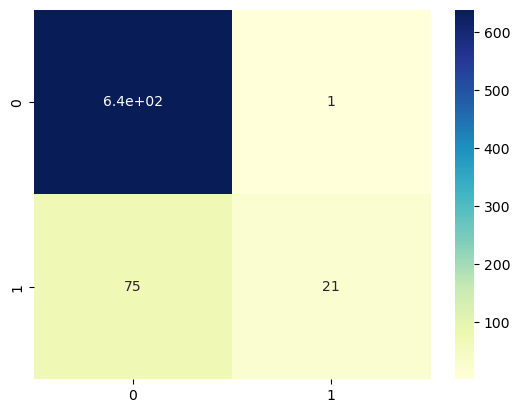

In [127]:
gnb = GaussianNB()

# Define the hyperparameter grid (var_smoothing)
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # 100 values between 1 and 1e-9
}

# Initialize GridSearchCV
grid_search_gnb = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model on the training data
grid_search_gnb.fit(X_train, Y_train)
#random_search_rf.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_gnb = grid_search_gnb.best_estimator_
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# Training performance
y_pred_train = best_gnb.predict(X_train)
y_pred_test = best_gnb.predict(X_test)

print("Training Report")
print(classification_report(y_pred=y_pred_train,y_true=Y_train))
print("Testing Report")
print(classification_report(y_test, y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,cmap='YlGnBu')
plt.show()

## SVM

Training Report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2432
           1       1.00      0.26      0.41       509

    accuracy                           0.87      2941
   macro avg       0.93      0.63      0.67      2941
weighted avg       0.89      0.87      0.84      2941

Testing Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       640
           1       1.00      0.28      0.44        96

    accuracy                           0.91       736
   macro avg       0.95      0.64      0.69       736
weighted avg       0.92      0.91      0.88       736



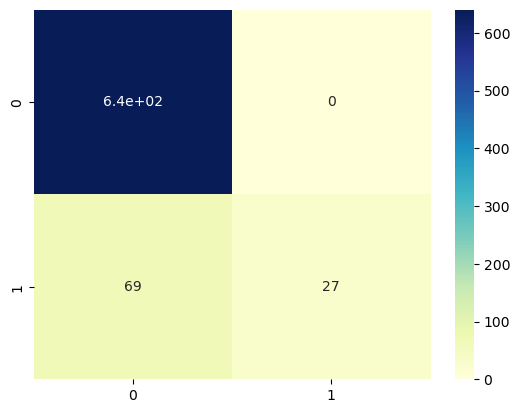

In [128]:
from sklearn.svm import SVC

svm = SVC()

# Train the model
svm.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

# Evaluate the model
lr_accuracy = accuracy_score(list(y_test), y_pred_lr_test)
print("Training Report")
print(classification_report(y_pred=y_pred_train,y_true=Y_train))
print("Testing Report")
print(classification_report(y_test, y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,cmap='YlGnBu')
plt.show()

# Tuning  SVM

svm = SVC()

### Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],       # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],   # Kernel type
    'degree': [2, 3, 4],                # Degree of the polynomial kernel (only used when kernel='poly')
}

### Initialize GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

### Fit the model on the training data
grid_search_svm.fit(X_train, Y_train)
#random_search_rf.fit(X_train, y_train)

### Get the best parameters and the best estimator
best_svm = grid_search_svm.best_estimator_
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

### Training performance
y_pred_train = best_svm.predict(X_train)
y_pred_test = best_svm.predict(X_test)

print("Training Report")
print(classification_report(y_pred=y_pred_train,y_true=Y_train))
print("Testing Report")
print(classification_report(y_test, y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,cmap='YlGnBu')
plt.show()

## KNN

Training Report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2432
           1       0.93      0.44      0.60       509

    accuracy                           0.90      2941
   macro avg       0.91      0.72      0.77      2941
weighted avg       0.90      0.90      0.88      2941

Testing Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       640
           1       0.80      0.42      0.55        96

    accuracy                           0.91       736
   macro avg       0.86      0.70      0.75       736
weighted avg       0.90      0.91      0.90       736



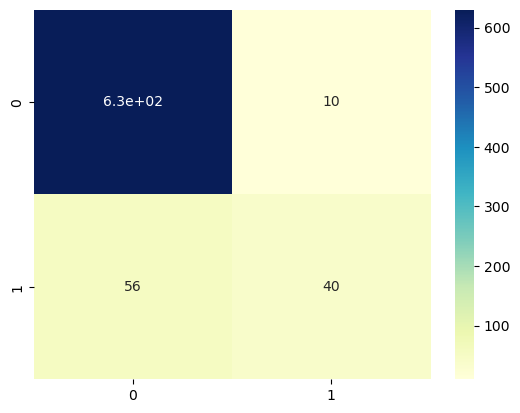

In [129]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

# Evaluate the model
print("Training Report")
print(classification_report(y_pred=y_pred_train,y_true=Y_train))
print("Testing Report")
print(classification_report(y_test, y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,cmap='YlGnBu')
plt.show()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Random Forest Parameters: {'bootstrap': False, 'max_depth': 33, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 178}
Training Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2432
           1       1.00      1.00      1.00       509

    accuracy                           1.00      2941
   macro avg       1.00      1.00      1.00      2941
weighted avg       1.00      1.00      1.00      2941

Testing Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       640
           1       0.97      0.38      0.54        96

    accuracy                           0.92       736
   macro avg       0.94      0.69      0.75       736
weighted avg       0.92      0.92      0.90       736



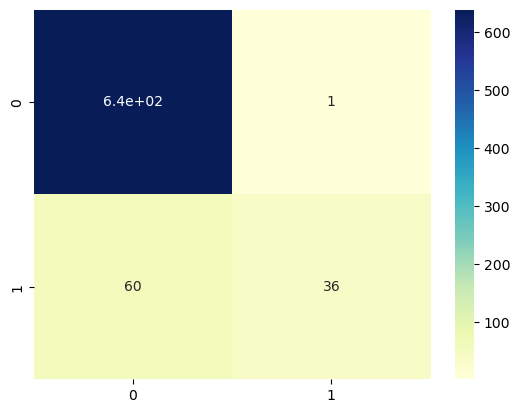

In [130]:
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],        # Values for the number of neighbors (k)
    'weights': ['uniform', 'distance'],          # How to weight neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'p': [1, 2] if 'minkowski' in param_grid.get('metric', []) else [2],  # p=1 (Manhattan), p=2 (Euclidean)
}

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model on the training data
grid_search_knn.fit(X_train, Y_train)
#random_search_rf.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_knn = grid_search_knn.best_estimator_
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# Training performance
y_pred_train = best_knn.predict(X_train)
y_pred_test = best_knn.predict(X_test)

print("Training Report")
print(classification_report(y_pred=y_pred_train,y_true=Y_train))
print("Testing Report")
print(classification_report(y_test, y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,cmap='YlGnBu')
plt.show()

## Gradient Boosting Machines

Training Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2432
           1       0.98      0.83      0.90       509

    accuracy                           0.97      2941
   macro avg       0.97      0.91      0.94      2941
weighted avg       0.97      0.97      0.97      2941

Testing Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       640
           1       0.88      0.75      0.81        96

    accuracy                           0.95       736
   macro avg       0.92      0.87      0.89       736
weighted avg       0.95      0.95      0.95       736



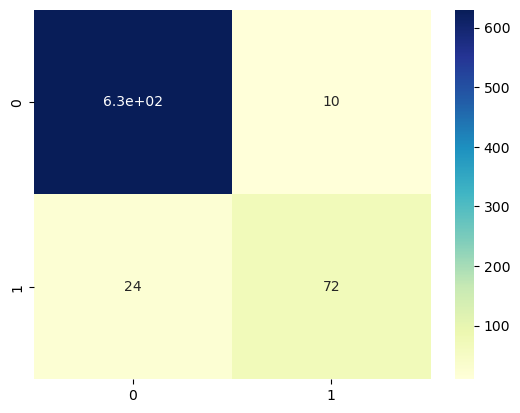

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()

# Train the model
gbm.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test = gbm.predict(X_test)
y_pred_train = gbm.predict(X_train)

# Evaluate the model
print("Training Report")
print(classification_report(y_pred=y_pred_train,y_true=Y_train))
print("Testing Report")
print(classification_report(y_test, y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,cmap='YlGnBu')
plt.show()

## LightGBM

[LightGBM] [Info] Number of positive: 509, number of negative: 2432
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1448
[LightGBM] [Info] Number of data points in the train set: 2941, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.173070 -> initscore=-1.564021
[LightGBM] [Info] Start training from score -1.564021
Training Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2432
           1       1.00      1.00      1.00       509

    accuracy                           1.00      2941
   macro avg       1.00      1.00      1.00      2941
weighted avg       1.00      1.00      1.00      2941

Testing Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       640
           1       0.88      0.79      0.84

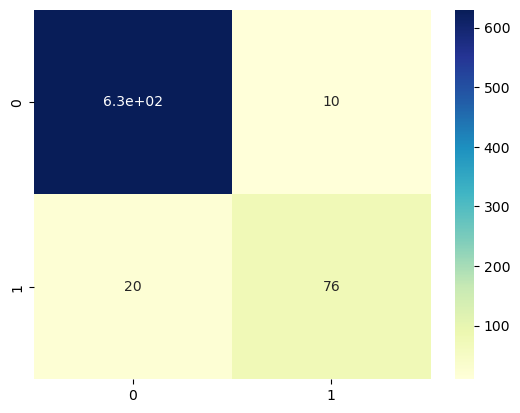

In [132]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31)

# Train the model
lgb_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test = lgb_model.predict(X_test)
y_pred_train = lgb_model.predict(X_train)

# Evaluate the model
print("Training Report")
print(classification_report(y_pred=y_pred_train,y_true=Y_train))
print("Testing Report")
print(classification_report(y_test, y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,cmap='YlGnBu')
plt.show()

# Tuning LGB

lgb_model = lgb.LGBMClassifier()

## Define the hyperparameter grid
param_grid = {
    'num_leaves': [31, 50, 70],                 # Controls model complexity
    'learning_rate': [0.01, 0.05, 0.1],         # Shrinks contribution of each tree
    'n_estimators': [100, 200, 500],            # Number of boosting iterations
    'max_depth': [3, 5, 7, -1],                 # Max depth of each tree (-1 for no limit)
    'min_data_in_leaf': [20, 40, 60],           # Minimum data per leaf to avoid overfitting
    'feature_fraction': [0.8, 0.9, 1.0],        # Fraction of features for each tree
    'bagging_fraction': [0.8, 0.9, 1.0],        # Fraction of data used for bagging
    'lambda_l1': [0.0, 0.1, 1.0],               # L1 regularization
    'lambda_l2': [0.0, 0.1, 1.0],               # L2 regularization
}

## Initialize GridSearchCV
grid_search_lgb = GridSearchCV(lgb_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

## Fit the model on the training data
grid_search_lgb.fit(X_train, Y_train)
#random_search_rf.fit(X_train, y_train)

## Get the best parameters and the best estimator
best_lgb = grid_search_lgb.best_estimator_
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

## Training performance
y_pred_train = best_lgb.predict(X_train)
y_pred_test = best_lgb.predict(X_test)

print("Training Report")
print(classification_report(y_pred=y_pred_train,y_true=Y_train))
print("Testing Report")
print(classification_report(y_test, y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,cmap='YlGnBu')
plt.show()

## XGBoost

Training Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2432
           1       1.00      1.00      1.00       509

    accuracy                           1.00      2941
   macro avg       1.00      1.00      1.00      2941
weighted avg       1.00      1.00      1.00      2941

Testing Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       640
           1       0.89      0.75      0.81        96

    accuracy                           0.96       736
   macro avg       0.93      0.87      0.89       736
weighted avg       0.95      0.96      0.95       736



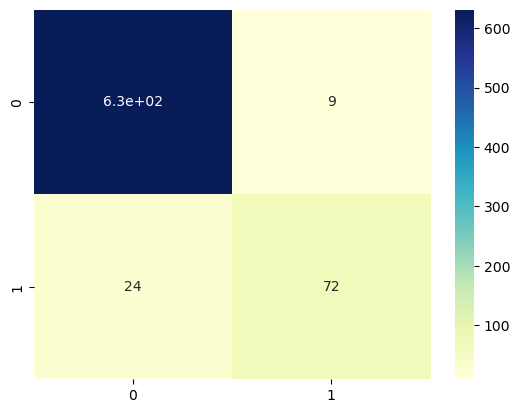

In [133]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

# Train the model
xgb.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train)

# Evaluate the model
print("Training Report")
print(classification_report(y_pred=y_pred_train,y_true=Y_train))
print("Testing Report")
print(classification_report(y_test, y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,cmap='YlGnBu')
plt.show()

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters from Grid Search: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1}
Testing Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       640
           1       0.88      0.80      0.84        96

    accuracy                           0.96       736
   macro avg       0.92      0.89      0.91       736
weighted avg       0.96      0.96      0.96       736



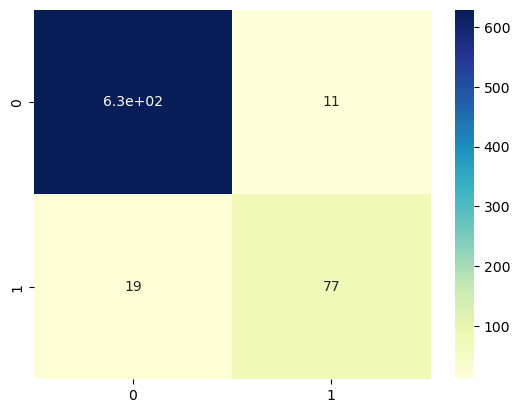

In [134]:
## Hyperparameter Tuning with Cross-Validation for XGBoost Classifier

# Define the hyperparameter grid for XGBoost
xgb_params = {
    'n_estimators': [1000], # Number of boosting rounds (trees)
    'max_depth': [5], # Maximum depth of a tree
    'learning_rate': [0.01, 0.2], # Step size for each boosting step
    'subsample': [1], # Subsampling of the training data per tree
    'colsample_bytree': [0.9, 1], # Fraction of features to consider for each tree
    'gamma': [0.1], # Minimum loss reduction to create a split
    'reg_alpha': [0.1], # L1 regularization term
    'reg_lambda': [1] # L2 regularization term
}

# Use GridSearchCV to perform hyperparameter tuning with 5-fold cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=xgb_params, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)

# Fit the model on the training data with hyperparameter tuning
grid_search_xgb.fit(X_train, Y_train)

# Get the best parameters and the best estimator after tuning
best_xgb = grid_search_xgb.best_estimator_
print("Best Parameters from Grid Search:", grid_search_xgb.best_params_)

# Training performance
y_pred_train = best_xgb.predict(X_train)
y_pred_test = best_rf.predict(X_test)
print("Testing Report")
print(classification_report(y_test, y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,cmap='YlGnBu')
plt.show()

## AdaBoost

Training Report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2432
           1       0.77      0.53      0.63       509

    accuracy                           0.89      2941
   macro avg       0.84      0.75      0.78      2941
weighted avg       0.88      0.89      0.88      2941

Testing Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       640
           1       0.61      0.47      0.53        96

    accuracy                           0.89       736
   macro avg       0.77      0.71      0.73       736
weighted avg       0.88      0.89      0.89       736



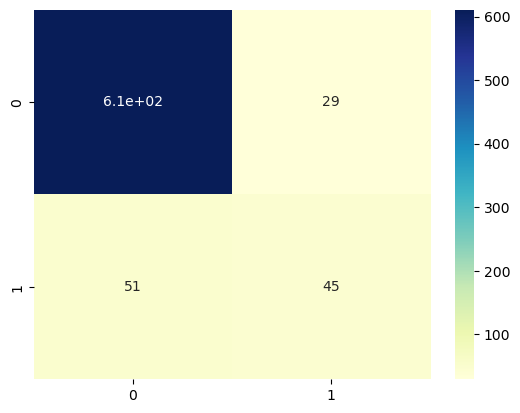

In [135]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

# Train the model
ada.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test = ada.predict(X_test)
y_pred_train = ada.predict(X_train)

# Evaluate the model
print("Training Report")
print(classification_report(y_pred=y_pred_train,y_true=Y_train))
print("Testing Report")
print(classification_report(y_true=y_test, y_pred=y_pred_test))
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred_test),annot=True,cmap='YlGnBu')
plt.show()

## From the above models XGBoost performs best

Training Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2432
           1       1.00      1.00      1.00       509

    accuracy                           1.00      2941
   macro avg       1.00      1.00      1.00      2941
weighted avg       1.00      1.00      1.00      2941

Testing Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       640
           1       0.89      0.75      0.81        96

    accuracy                           0.96       736
   macro avg       0.93      0.87      0.89       736
weighted avg       0.95      0.96      0.95       736



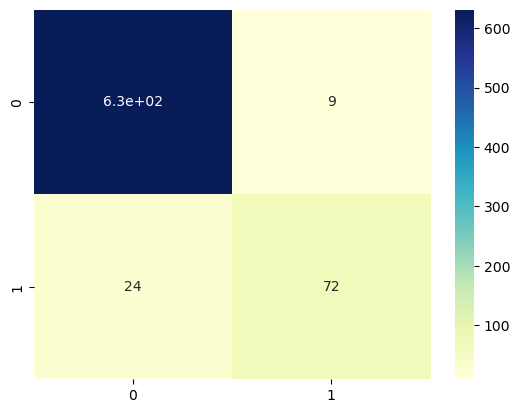

In [136]:
from xgboost import XGBClassifier

best_model = XGBClassifier()

# Train the model
best_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Evaluate the model
print("Training Report")
print(classification_report(y_pred=y_pred_train,y_true=Y_train))
print("Testing Report")
print(classification_report(y_test, y_pred_test))
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True,cmap='YlGnBu')
plt.show()

## Model Explainability

                       Feature  Importance
5                totalevecalls    2.390437
0                accountlength    2.490178
7              totalnightcalls    2.735402
3                totaldaycalls    3.291770
6            totalnightminutes    4.431273
4              totaleveminutes    6.793812
8             totalintlminutes    6.928740
9               totalintlcalls    9.356347
2              totaldayminutes   14.588636
10  numbercustomerservicecalls   17.570297
1            internationalplan   29.423111


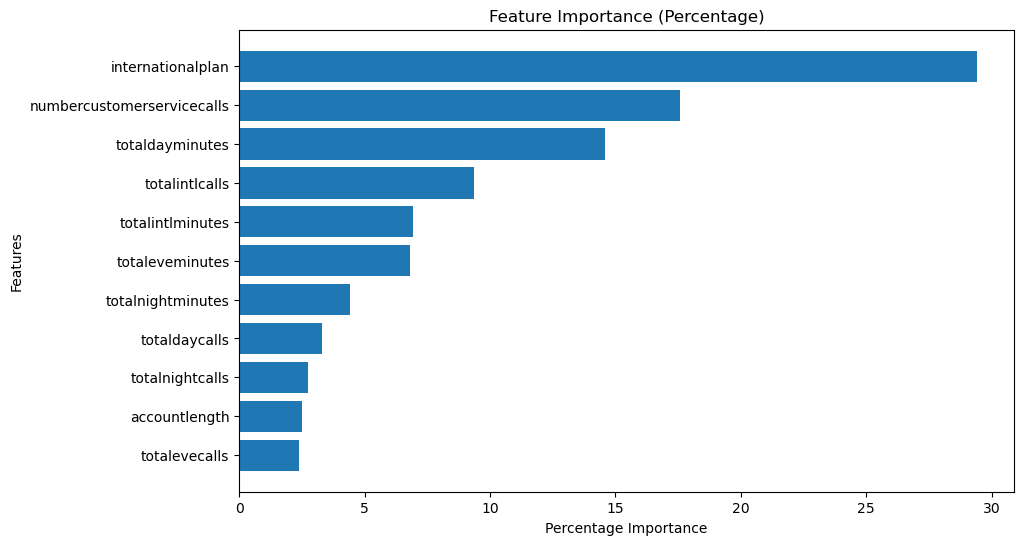

In [137]:
feature_importances = best_model.feature_importances_

# Convert to percentage
importance_percentage = 100.0 * (feature_importances / feature_importances.sum())

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is a DataFrame
    'Importance': importance_percentage
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=True)

# Print feature importance percentages
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Percentage Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Percentage)')
plt.show()

In [138]:
import shap

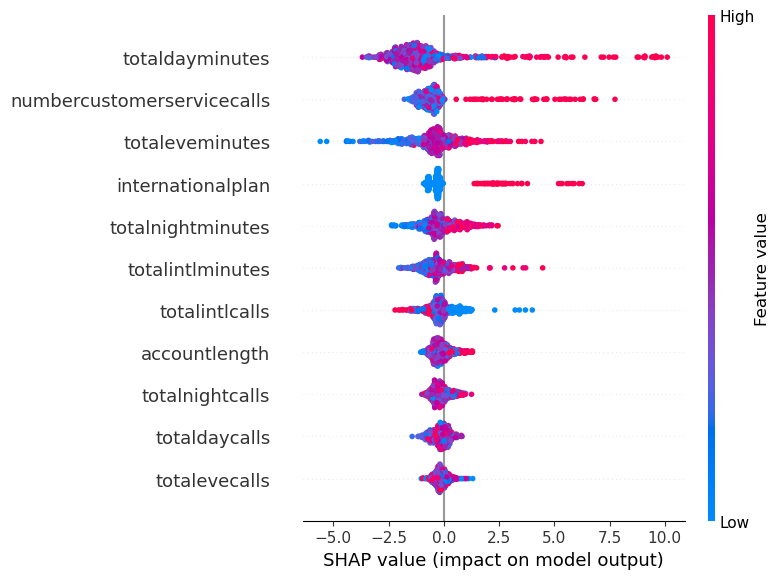

In [139]:
#Using SHAP Values
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

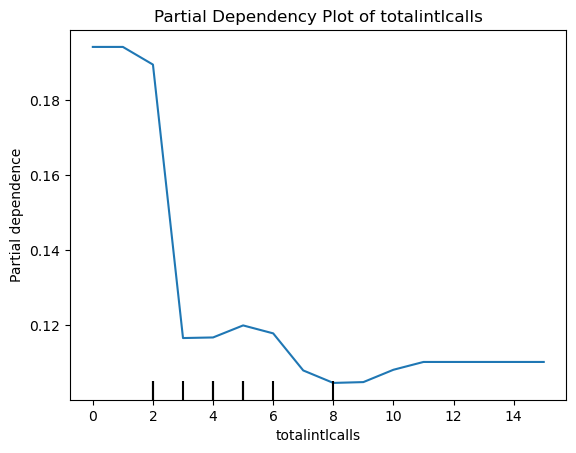

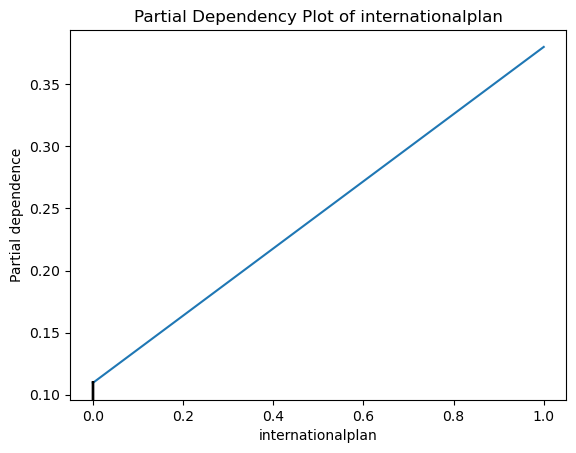

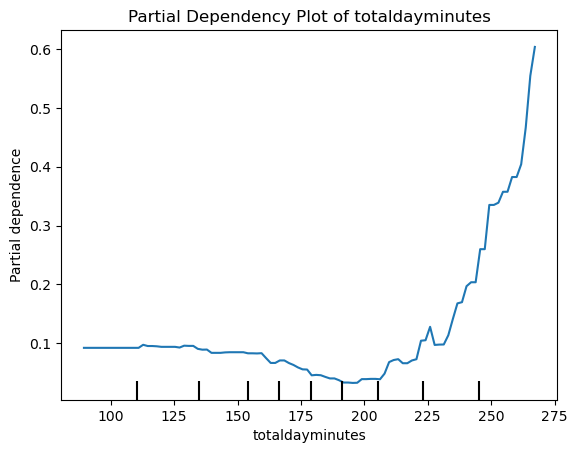

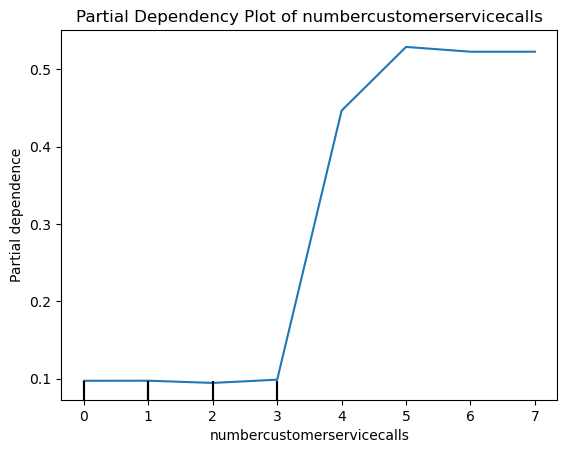

In [140]:
from sklearn.inspection import PartialDependenceDisplay
best_ft = ['totalintlcalls','internationalplan','totaldayminutes','numbercustomerservicecalls']
for col in best_ft:
    PartialDependenceDisplay.from_estimator(best_model, X_test, features=[col])
    plt.title(f"Partial Dependency Plot of {col}")
    plt.show()